<a href="https://colab.research.google.com/github/ilaydakaraca/PoreD2/blob/main/PoreD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



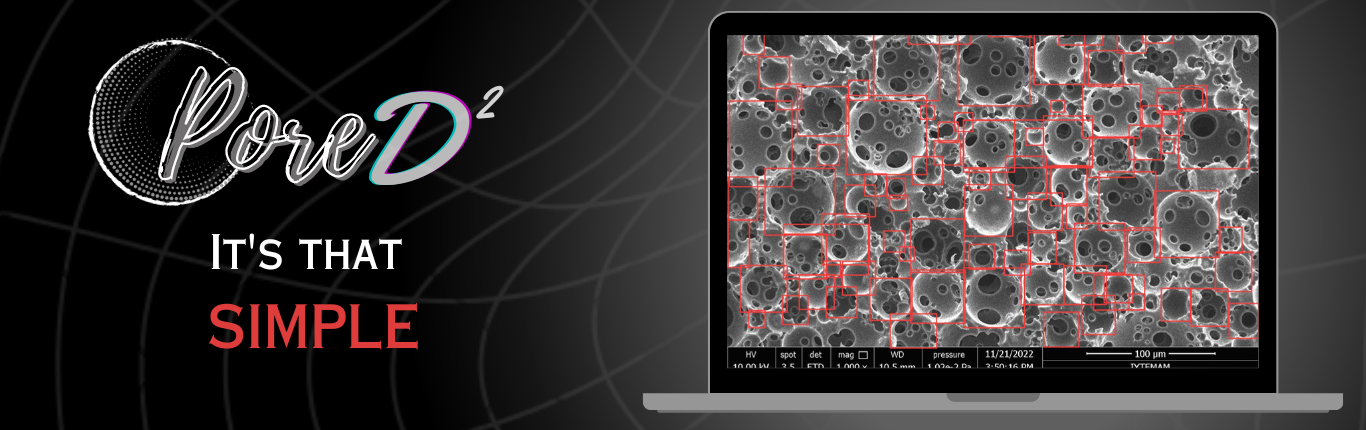

# **PoreD2**

Quantitative Evaluation of Emulsion Templated Tissue Engineering Scaffolds Using YoloV5 from SEM Images


*   *First, run following cells to install and import all required libraries*

---





In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [6]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import openpyxl
import pandas as pd
import easyocr
import matplotlib.pyplot as plt
import cv2
import openpyxl
from openpyxl.utils import get_column_letter
from openpyxl.styles import PatternFill
import requests
import os
import glob

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)





---


* *Run the following cells for uploading and defining the trained weights*


---



In [4]:
url1 = 'https://github.com/ilaydakaraca/PoreD2/raw/main/weights/bestpore.pt?download='
r1 = requests.get(url1, allow_redirects=True)

open('bestpore.pt', 'wb').write(r1.content)

url2 = 'https://github.com/ilaydakaraca/PoreD2/raw/main/weights/best_scale_bar.pt?download='
r2 = requests.get(url2, allow_redirects=True)

open('best_scale_bar.pt', 'wb').write(r2.content)

url3 = 'https://github.com/ilaydakaraca/PoreD2/raw/main/weights/best_window.pt?download='
r3 = requests.get(url3, allow_redirects=True)

open('best_window.pt', 'wb').write(r3.content)

280910709

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/bestpore.pt')
model2 = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/best_scale_bar.pt')
model3 = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/best_window.pt')

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 416 layers, 139970872 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 416 layers, 139970872 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 
Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 416 layers, 139970872 parameters, 0 gradients, 207.9 GFLOPs
Adding AutoShape... 





---


*   *Before the next section, be sure that the folder containing images to be used are uploded into the file section of Colab*

  *   You can upload a zip file of your folder (If you do so please delete the hashtag (#) symbol before the first line (which starts with unzip) and change the 'path_to_your_zip_file' section with the corresponding path) or
  *   You can create a folder and upload your images into that folder


*   *Change the 'path_to_your_folder' section with the corresponding path that includes images*
*   *Run the cell for Pore detection*


---



In [22]:
#!unzip "path_to_your_zip_file" -d "/content"
output_folder = ''
directory = 'path_to_your_folder'
jpg_files = glob.glob(os.path.join(directory, "*.jpg"))
image_names = [os.path.basename(file) for file in jpg_files]
for image_name in image_names:
    image = os.path.join(directory, image_name)
    results = model(image)
    results.save(output_folder, "/content/yolov5/pore/image")
    output_path = os.path.join(output_folder, image_name)
    results.print()
    results.pandas().xywh[0].to_excel("/content/yolov5/pore/"+output_path + "_pore.xlsx")



Saved 1 image to /content/yolov5/pore/image7
image 1/1: 1103x1536 43 poress
Speed: 27.0ms pre-process, 3782.3ms inference, 1.9ms NMS per image at shape (1, 3, 512, 640)
Saved 1 image to /content/yolov5/pore/image8
image 1/1: 1103x1536 390 poress
Speed: 32.0ms pre-process, 3462.2ms inference, 8.9ms NMS per image at shape (1, 3, 512, 640)
Saved 1 image to /content/yolov5/pore/image9
image 1/1: 1103x1536 390 poress
Speed: 20.3ms pre-process, 2746.1ms inference, 9.0ms NMS per image at shape (1, 3, 512, 640)




---


*   *Run the cell for Scale bar detection*


---







In [23]:
output_folder2 = ''
for image_name in image_names:
    image = os.path.join(directory, image_name)
    results2 = model2(image)
    results2.save(output_folder2, "/content/yolov5/scalebar/image")
    output_path = os.path.join(output_folder2, image_name)
    results2.print()
    results2.pandas().xywh[0].to_excel("/content/yolov5/scalebar/"+output_path + "_scalebar.xlsx")

Saved 1 image to /content/yolov5/scalebar/image7
image 1/1: 1103x1536 1 line
Speed: 30.5ms pre-process, 2823.2ms inference, 1.1ms NMS per image at shape (1, 3, 512, 640)
Saved 1 image to /content/yolov5/scalebar/image8
image 1/1: 1103x1536 1 line
Speed: 21.5ms pre-process, 2928.3ms inference, 1.0ms NMS per image at shape (1, 3, 512, 640)
Saved 1 image to /content/yolov5/scalebar/image9
image 1/1: 1103x1536 1 line
Speed: 21.2ms pre-process, 4275.7ms inference, 1.6ms NMS per image at shape (1, 3, 512, 640)




---


*   *Run the cell for window detection*


---







In [24]:
output_folder3 = ''
for image_name in image_names:
    # Construct the full path to the image
    image = os.path.join(directory, image_name)
    results3 = model3(image)
    results3.save(output_folder3, "/content/yolov5/window/image")
    output_path = os.path.join(output_folder3, image_name)
    results3.print()
    results3.pandas().xywh[0].to_excel("/content/yolov5/window/"+output_path + "_window.xlsx")

Saved 1 image to /content/yolov5/window/image4
image 1/1: 1103x1536 130 windowss
Speed: 22.2ms pre-process, 2855.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
Saved 1 image to /content/yolov5/window/image5
image 1/1: 1103x1536 585 windowss
Speed: 22.0ms pre-process, 3438.3ms inference, 7.9ms NMS per image at shape (1, 3, 512, 640)
Saved 1 image to /content/yolov5/window/image6
image 1/1: 1103x1536 585 windowss
Speed: 30.2ms pre-process, 3294.0ms inference, 5.6ms NMS per image at shape (1, 3, 512, 640)




---


*   *Following cells are for defining files obtained from detection*


---






In [10]:
import os

# Define the input file directories
input_directory = "/content/yolov5/pore/"
input_directory2 = "/content/yolov5/scalebar/"
input_directory3 = "/content/yolov5/window/"

# List all Excel files in each directory
input_file = [os.path.join(input_directory, file)
               for file in os.listdir(input_directory)
               if file.endswith('.xlsx') or file.endswith('.xls')]


input_file2 = [os.path.join(input_directory2, file)
               for file in os.listdir(input_directory2)
               if file.endswith('.xlsx') or file.endswith('.xls')]

input_file3 = [os.path.join(input_directory3, file)
               for file in os.listdir(input_directory3)
               if file.endswith('.xlsx') or file.endswith('.xls')]


# Print the list of Excel files in each directory
print("Excel files in directory 1:")
for file in input_file:
    print(file)

print("\nExcel files in directory 2:")
for file in input_file2:
    print(file)

print("\nExcel files in directory 3:")
for file in input_file3:
    print(file)

text_file_path = "text.txt"

Excel files in directory 1:
/content/yolov5/pore/12.jpg_pore.xlsx
/content/yolov5/pore/11.jpg_pore.xlsx
/content/yolov5/pore/13.jpg_pore.xlsx

Excel files in directory 2:
/content/yolov5/scalebar/11.jpg_scalebar.xlsx
/content/yolov5/scalebar/12.jpg_scalebar.xlsx
/content/yolov5/scalebar/13.jpg_scalebar.xlsx

Excel files in directory 3:
/content/yolov5/window/12.jpg_window.xlsx
/content/yolov5/window/11.jpg_window.xlsx
/content/yolov5/window/13.jpg_window.xlsx




---



*   *Run the following cell for loading the easyocr model for text detection*


---





In [11]:
reader = easyocr.Reader(['en']) # need to run only once to load model into memory

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete



---



*   Run the following cell for performing text detection and saving as a '.txt' file

*   Check if the output is correct


---



In [12]:
result_text = reader.readtext(image)
text = result_text[7][1]
print(text)
with open('text.txt', 'w') as f:
    print(text, file=f)
with open(text_file_path, 'r') as text_file:
    text_data = text_file.read()


100 um




---



*   If the output of the previous cell is correct, continue without running the next cell.
*   If is not, than wrote the correct information between the Quotation mark below. Then, delete the hashtag (#) symbol and run the cell.


---







In [ ]:
#text_data = "50 um"

In [13]:
def load_workbook(file_path):
    try:
        wb = openpyxl.load_workbook(file_path)
        ws = wb.active
        return wb, ws
    except Exception as e:
        print(f"Error loading workbook from {file_path}: {e}")
        return None, None

for file_path in input_file2:
    input2_wb, input2_ws = load_workbook(file_path)
    if input2_wb and input2_ws:
      input_value = input2_ws['D2'].value

383.3045654296875




---



*   *Run the cell for calculating required values (ex. average pore size) for pores*


---





In [14]:
#for pore
for file_path in input_file:
    input_wb, input_ws = load_workbook(file_path)
    if input_wb and input_ws:


      input_ws['N1'] = 'Avg. Pore Size (px)'
      input_ws['O1'] = 'Scale Bar Size (px)'
      input_ws['P1'] = 'Avg. Pore Size (μm)'
      input_ws['Q1'] = 'Avg. Pore Size (μm) w/cf'
      input_ws['R1'] = 'Scale Bar Text'
      input_ws['S1'] = 'Scale Bar #'
      input_ws['T1'] = 'Scale Bar Unit'

      target_cell = input_ws['R2']  # Replace 'A1' with the desired cell reference
      target_cell.value = text_data

      total_rows = input_ws.max_row
      for row_number in range(total_rows, 1, -1):
          d_value = input_ws.cell(row=row_number, column=4).value  # D column (4th column) value
          e_value = input_ws.cell(row=row_number, column=5).value  # E column (5th column) value

          # Compare the values and get the larger one
          if d_value and e_value:
              larger_value = max(d_value, e_value)

              # Write the larger value to column K
              input_ws.cell(row=row_number, column=11, value=larger_value)

      # Delete the previous rows
      # Determine the total number of rows in the worksheet
      total_rows = input_ws.max_row

      # Initialize variables to store sum and count
      sum_k = 0
      count = 0

      # Iterate through rows in column K (excluding the header)
      for row_number in range(2, total_rows + 1):
          k_value = input_ws.cell(row=row_number, column=11).value  # K column (11th column) value
          if k_value is not None:
              sum_k += k_value
              count += 1

      # Calculate the average
      average_k = sum_k / count if count > 0 else 0

      # Write the average to a new cell (e.g., L2)
      input_ws['N2'] = average_k

      #input_value = input2_ws['D2'].value
      input_ws['O2'] = input_value

      cell_value = input_ws['R2'].value
      if cell_value:
          part1 = cell_value[:-3]
          part2 = cell_value[-3:]

          input_ws['S2'].value = part1
          input_ws['T2'].value = part2

      # Extract values from cells L2 and M2
      n2_value = input_ws['N2'].value
      o2_value = input_ws['O2'].value
      s2_value = input_ws['S2'].value
      #p2_value = input_ws['P2'].value
      # Perform the desired calculations
      result = (n2_value / o2_value) * int(s2_value)
      input_ws['P2'] = result
      p2_value = input_ws['P2'].value
      result2 = (p2_value*2)/(1.7320508076)
      input_ws['Q2'] = result2

      original_column = input_ws['K']
      new_column1 = input_ws['L']
      new_column2 = input_ws['M']

      multiply_by1 = 2/1.7320508076
      multiply_by2 = (s2_value)
      divide_by = (o2_value)

      for cell in original_column:
          if cell.value is not None and not isinstance(cell.value, str):
              result3 = float(cell.value) * float(multiply_by1)
              new_column1[cell.row - 1].value = result3

      for cell in original_column:
          if cell.value is not None and not isinstance(cell.value, str):
              result4 = float(cell.value)/float(o2_value)*float(s2_value)* float(multiply_by1)
              new_column2[cell.row - 1].value = result4

      input_ws['K1'] = 'Pore Size (px)'
      input_ws['L1'] = 'Pore Size (w/Correction factor)'
      input_ws['M1'] = 'Pore Size (μm, w/CF)'

      fill1 = PatternFill(start_color="FF5F1F", end_color="FF5F1F", fill_type="solid")
      fill_cell1 = input_ws['K1']
      fill_cell2 = input_ws['L1']
      fill_cell3 = input_ws['M1']
      fill_cell4 = input_ws['P1']
      fill_cell5 = input_ws['Q1']
      fill_cell1.fill = fill1
      fill_cell2.fill = fill1
      fill_cell3.fill = fill1
      fill_cell4.fill = fill1
      fill_cell5.fill = fill1
      fill2 = PatternFill(start_color="EBECF0", end_color="EBECF0", fill_type="solid")
      fill_cell6 = input_ws['N1']
      fill_cell7 = input_ws['O1']
      fill_cell8 = input_ws['R1']
      fill_cell9 = input_ws['S1']
      fill_cell10 = input_ws['T1']
      fill_cell6.fill = fill2
      fill_cell7.fill = fill2
      fill_cell8.fill = fill2
      fill_cell9.fill = fill2
      fill_cell10.fill = fill2

      for column in input_ws.columns:
          max_length = 0
          column_letter = get_column_letter(column[0].column)  # Get the column letter (e.g., 'A', 'B', 'C', ...)

          for cell in column:
              try:
                  # Calculate the length of the cell's value
                  if len(str(cell.value)) > max_length:
                      max_length = len(cell.value)
              except:
                  pass
          # Set the column width based on the maximum content length
          adjusted_width = (max_length)  # Add some padding
          input_ws.column_dimensions[column_letter].width = adjusted_width
          input_wb.save(file_path)



---



*   *Run the cell for calculating required values (ex. average window size, Degree of interconnectivity) for windows*


---





In [15]:
#for window
for file_path in input_file3:
    input3_wb, input3_ws = load_workbook(file_path)
    if input3_wb and input3_ws:


      input3_ws['M1'] = 'Avg. Window Size (px)'
      input3_ws['N1'] = 'Scale Bar Size (px)'
      input3_ws['O1'] = 'Avg. Window Size (μm)'
      input3_ws['P1'] = 'Scale Bar Text'
      input3_ws['Q1'] = 'Scale Bar #'
      input3_ws['R1'] = 'Scale Bar Unit'

      target_cell = input3_ws['P2']  # Replace 'A1' with the desired cell reference
      target_cell.value = text_data

      total_rows = input3_ws.max_row
      for row_number in range(total_rows, 1, -1):
          d_value = input3_ws.cell(row=row_number, column=4).value  # D column (4th column) value
          e_value = input3_ws.cell(row=row_number, column=5).value  # E column (5th column) value

          # Compare the values and get the larger one
          if d_value and e_value:
              larger_value = max(d_value, e_value)

              # Write the larger value to column K
              input3_ws.cell(row=row_number, column=11, value=larger_value)

      # Delete the previous rows
      # Determine the total number of rows in the worksheet
      total_rows = input3_ws.max_row

      # Initialize variables to store sum and count
      sum_k = 0
      count = 0

      # Iterate through rows in column K (excluding the header)
      for row_number in range(2, total_rows + 1):
          k_value = input3_ws.cell(row=row_number, column=11).value  # K column (11th column) value
          if k_value is not None:
              sum_k += k_value
              count += 1

      # Calculate the average
      average_k = sum_k / count if count > 0 else 0

      # Write the average to a new cell (e.g., L2)
      input3_ws['M2'] = average_k

      #input_value = input2_ws['D2'].value
      input3_ws['N2'] = input_value


      cell_value = input3_ws['P2'].value
      if cell_value:
          part1 = cell_value[:-3]
          part2 = cell_value[-3:]

          input3_ws['Q2'].value = part1
          input3_ws['R2'].value = part2

      # Extract values from cells L2 and M2
      m2_value = input3_ws['M2'].value
      n2_value = input3_ws['N2'].value
      q2_value = input3_ws['Q2'].value
      #p2_value = input_ws['P2'].value
      # Perform the desired calculations
      result = (m2_value / n2_value) * int(q2_value)
      input3_ws['O2'] = result

      DI = result/result2
      input3_ws["S2"] = DI

      original_column = input3_ws['K']
      new_column1 = input3_ws['L']

      for cell in original_column:
          if cell.value is not None and not isinstance(cell.value, str):
              cell.value=input_ws['S2'].value
              result3 = float(cell.value)/float(n2_value) * float(q2_value)
              new_column1[cell.row - 1].value = result3

      input3_ws['K1'] = 'Window Size (px)'
      input3_ws['L1'] = 'Window_Size (μm)'
      input3_ws['S1'] = 'Degree of Interconnectivity (DI)'

      fill3 = PatternFill(start_color="FF5F1F", end_color="FF5F1F", fill_type="solid")
      fill_cell11 = input3_ws['K1']
      fill_cell12 = input3_ws['L1']
      fill_cell13 = input3_ws['O1']
      fill_cell19 = input3_ws['S1']
      fill_cell11.fill = fill3
      fill_cell12.fill = fill3
      fill_cell13.fill = fill3
      fill_cell19.fill = fill3

      fill4 = PatternFill(start_color="EBECF0", end_color="EBECF0", fill_type="solid")
      fill_cell14 = input3_ws['M1']
      fill_cell15 = input3_ws['N1']
      fill_cell16 = input3_ws['P1']
      fill_cell17 = input3_ws['Q1']
      fill_cell18 = input3_ws['R1']
      fill_cell14.fill = fill4
      fill_cell15.fill = fill4
      fill_cell16.fill = fill4
      fill_cell17.fill = fill4
      fill_cell18.fill = fill4

      for column in input3_ws.columns:
          max_length = 0
          column_letter = get_column_letter(column[0].column)  # Get the column letter (e.g., 'A', 'B', 'C', ...)

          for cell in column:
              try:
                  # Calculate the length of the cell's value
                  if len(str(cell.value)) > max_length:
                      max_length = len(cell.value)

              except:
                  pass
          # Set the column width based on the maximum content length
          adjusted_width = (max_length)  # Add some padding
          input3_ws.column_dimensions[column_letter].width = adjusted_width



      input3_wb.save(file_path)

      #return results, input_wb,  text



---



*   *Creating a Zip file that includes all output files*
*   *After running the following cell, 'outputs.zip' file will be created and can be downloaded through the file section of the Colab*


---






In [25]:
import os
from zipfile import ZipFile

!zip -r /content/pore ///content/yolov5/pore/
!zip -r /content/scalebar ///content/yolov5/scalebar/
!zip -r /content/window ///content/yolov5/window/

# Create a ZipFile Object
with ZipFile('/content/outputs.zip', 'w') as zip_object:
   # Adding files that need to be zipped
   zip_object.write('/content/pore.zip')
   zip_object.write('/content/scalebar.zip')
   zip_object.write('/content/window.zip')


# Check to see if the zip file is created
if os.path.exists('/content/outputs.zip'):
   print("ZIP file created")
else:
   print("ZIP file not created")

import shutil

# Specify the path of the folder you want to delete
folder_path = "/content/yolov5/pore/"
folder_path2 = "/content/yolov5/scalebar/"
folder_path3 = "/content/yolov5/window/"

shutil.rmtree(folder_path)
shutil.rmtree(folder_path2)
shutil.rmtree(folder_path3)

updating: content/yolov5/pore/ (stored 0%)
updating: content/yolov5/pore/12.jpg_pore.xlsx (deflated 7%)
updating: content/yolov5/pore/11.jpg_pore.xlsx (deflated 3%)
updating: content/yolov5/pore/image3/ (stored 0%)
updating: content/yolov5/pore/image3/11.jpg (deflated 2%)
updating: content/yolov5/pore/image2/ (stored 0%)
updating: content/yolov5/pore/image2/13.jpg (deflated 2%)
updating: content/yolov5/pore/13.jpg_pore.xlsx (deflated 3%)
updating: content/yolov5/pore/image/ (stored 0%)
updating: content/yolov5/pore/image/12.jpg (deflated 4%)
  adding: content/yolov5/pore/image8/ (stored 0%)
  adding: content/yolov5/pore/image8/13.jpg (deflated 4%)
  adding: content/yolov5/pore/image6/ (stored 0%)
  adding: content/yolov5/pore/image6/11.jpg (deflated 4%)
  adding: content/yolov5/pore/image5/ (stored 0%)
  adding: content/yolov5/pore/image5/13.jpg (deflated 4%)
  adding: content/yolov5/pore/image7/ (stored 0%)
  adding: content/yolov5/pore/image7/12.jpg (deflated 7%)
  adding: content/yo